In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
df=pd.read_csv("C:\\Users\\PRATHAMESH\\OneDrive\\Desktop\\Video Games Sales.csv")
df.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [106]:
df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Puzzle', 'Misc', 'Shooter',
       'Simulation', 'Role-Playing', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [73]:
df=df.rename(columns={"North America":"North_America_sales","Europe":"Europe_sales","Japan":"Japan_sales","Rest of World":"Rest_of_World_sales","Global":"Total_global_sales"})
df.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North_America_sales,Europe_sales,Japan_sales,Rest_of_World_sales,Total_global_sales,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [64]:

df=df.fillna(method="bfill",axis=0).fillna(0)
df.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North_America_sales,Europe_sales,Japan_sales,Rest_of_World_sales,Total_global_sales,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1907 non-null   int64  
 1   Rank                 1907 non-null   int64  
 2   Game Title           1907 non-null   object 
 3   Platform             1907 non-null   object 
 4   Year                 1907 non-null   float64
 5   Genre                1907 non-null   object 
 6   Publisher            1907 non-null   object 
 7   North_America_sales  1907 non-null   float64
 8   Europe_sales         1907 non-null   float64
 9   Japan_sales          1907 non-null   float64
 10  Rest_of_World_sales  1907 non-null   float64
 11  Total_global_sales   1907 non-null   float64
 12  Review               1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


In [66]:
df.Year.unique()

array([2006., 1985., 2008., 2009., 1989., 1984., 2005., 1999., 2007.,
       2004., 1990., 2010., 1988., 2002., 2001., 2011., 1998., 1996.,
       2012., 2000., 1992., 1997., 1993., 1994., 2003., 1986., 1995.,
       1991., 1987., 1983.])

In [67]:
year=df.groupby("Year").sum("int").reset_index()
year.head()

,Year,index,Rank,North_America_sales,Europe_sales,Japan_sales,Rest_of_World_sales,Total_global_sales,Review
0,1983.0,5755,5761,2.32,0.46,8.10,0.08,10.96,430.0
1,1984.0,6570,6579,32.15,1.85,11.00,0.65,45.66,646.7
2,1985.0,4616,4622,32.09,4.45,12.13,0.90,49.57,411.0
3,1986.0,9571,9583,10.59,2.60,13.58,0.40,27.17,897.0
4,1987.0,4531,4538,5.28,1.18,10.42,0.18,17.06,535.0


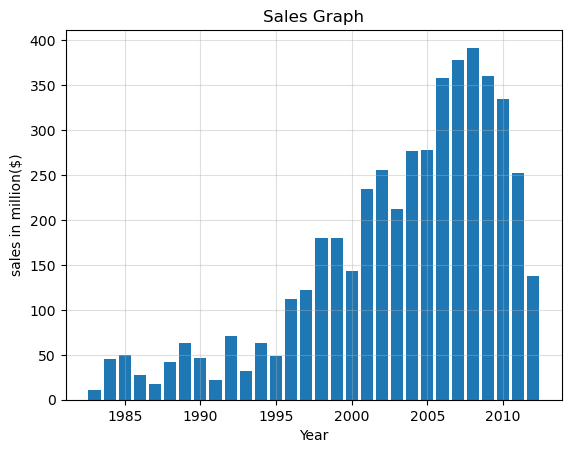

In [68]:
plt.bar(year.Year,year.Total_global_sales)
plt.title("Sales Graph")
plt.xlabel("Year")
plt.ylabel("sales in million($)")
plt.grid(True,alpha=0.4)
plt.show()

In [102]:
nin=df[df["Publisher"]== "Nintendo" ]
ea=df[df["Publisher"]== "Electronic Arts" ]
ninn=nin.groupby("Year").sum("int").reset_index()
eaa=ea.groupby("Year").sum("int").reset_index()
ninn.head()

,Year,index,Rank,North America,Europe,Japan,Rest of World,Global,Review
0,1983.0,5755,5761,2.32,0.46,8.10,0.08,10.96,430.0
1,1984.0,3942,3949,32.15,1.85,8.63,0.65,43.29,501.0
2,1985.0,3100,3105,32.09,4.45,11.08,0.90,48.52,358.0
3,1986.0,3097,3103,7.22,1.73,8.38,0.27,17.61,482.0
4,1987.0,1683,1687,5.13,1.18,5.46,0.18,11.95,302.0


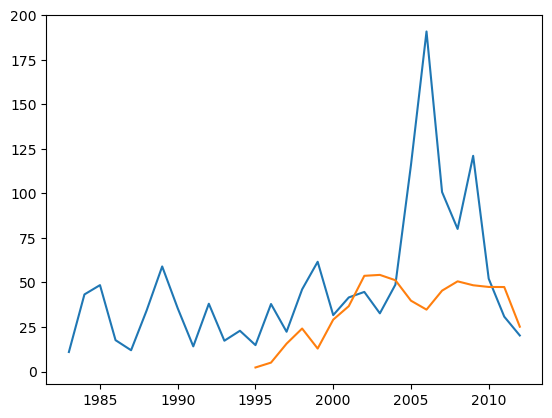

In [105]:

plt.plot(ninn["Year"],ninn["Global"])
plt.plot(eaa["Year"],eaa["Global"])
plt.show()

In [107]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Puzzle', 'Misc', 'Shooter',
       'Simulation', 'Role-Playing', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [112]:
region=df.groupby("Genre").sum("int").reset_index()
region

,Genre,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
0,Action,255509,255784,545391.0,320.88,205.91,45.66,64.87,637.27,21712.27
1,Adventure,102134,102244,210450.0,116.83,76.88,27.01,18.80,239.45,8962.82
2,Fighting,124404,124530,250327.0,133.07,63.49,34.01,18.44,249.00,10358.29
3,Misc,145017,145176,306827.0,205.46,131.48,50.78,38.35,426.12,11570.41
4,Platform,164916,165104,372144.0,317.03,139.54,104.17,34.42,595.24,14736.23
5,Puzzle,42363,42407,87980.0,60.72,18.58,25.00,4.35,108.65,3269.50
6,Racing,187907,188093,368507.0,214.35,151.62,43.79,42.08,451.80,14527.60
7,Role-Playing,147107,147280,342640.0,197.54,100.90,169.32,28.53,496.20,14517.02
8,Shooter,190084,190290,409163.0,333.40,155.89,14.22,53.84,557.20,16702.44
9,Simulation,92898,92990,184361.0,101.13,64.08,24.31,15.53,205.14,6790.69


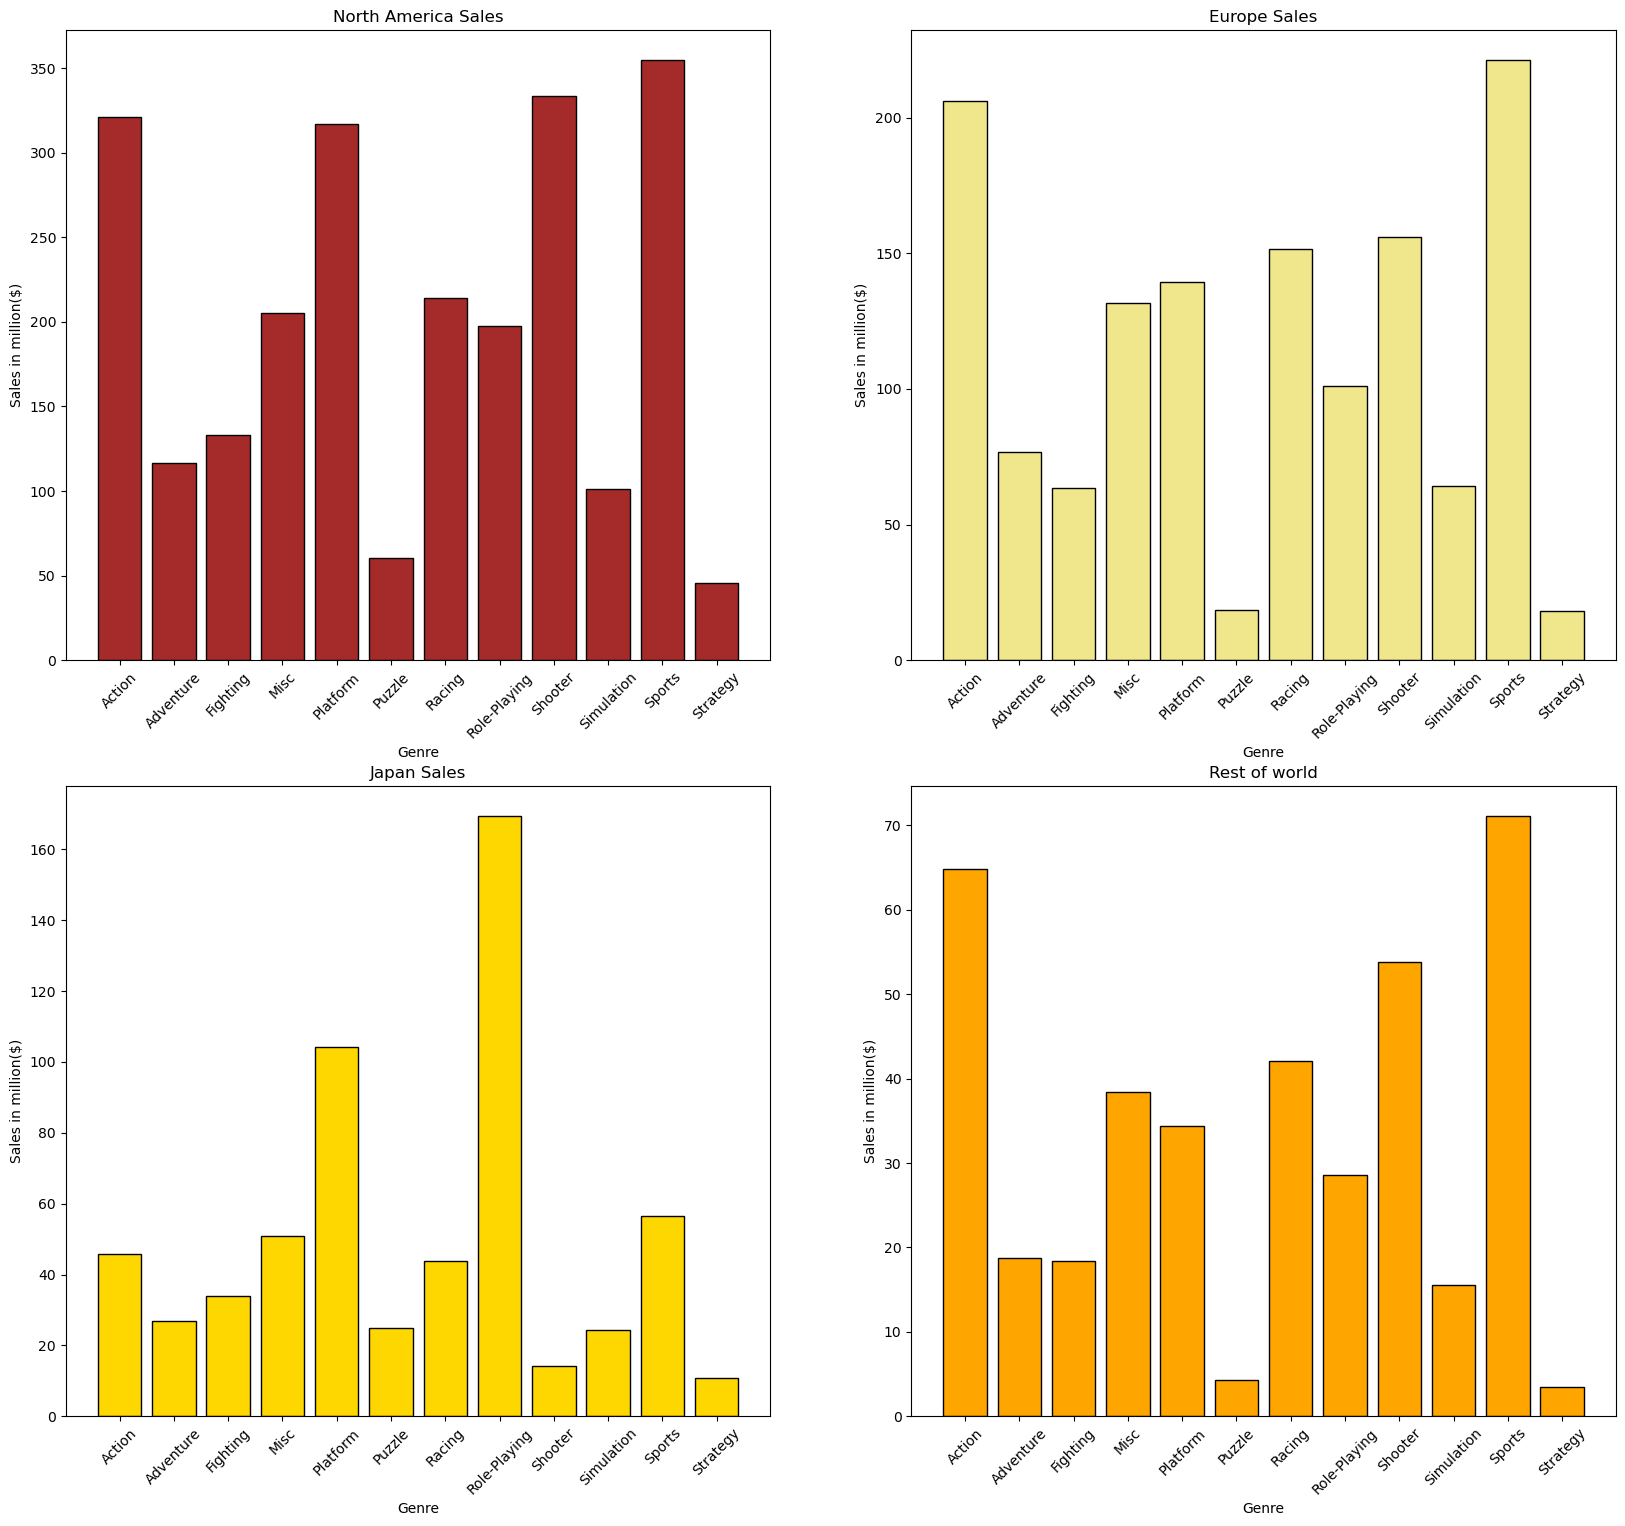

In [149]:
plt.figure(figsize=(20, 18))

# For 1st Graph****************
plt.subplot(2,2,1)
plt.bar(region["Genre"],region["North America"],edgecolor='black',color="brown")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Sales in million($)")
plt.title("North America Sales")

#For 2nd Graph*****************
plt.subplot(2,2,2)
plt.bar(region["Genre"],region["Europe"],edgecolor='black',color="khaki")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Sales in million($)")
plt.title("Europe Sales")

# For 3rd Graph****************
plt.subplot(2,2,3)
plt.bar(region["Genre"],region["Japan"],edgecolor='black',color="gold")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Sales in million($)")
plt.title("Japan Sales")

# For 4th Graph****************
plt.subplot(2,2,4)
plt.bar(region["Genre"],region["Rest of World"],edgecolor='black',color="orange")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Sales in million($)")
plt.title("Rest of world")


plt.show()